This notebook performs cohort analysis on Olist’s e-commerce dataset to understand customer behavior over time. It explores retention, average order value, and repeat orders segmented by first purchase month.

In [1]:
import pandas as pd

df = pd.read_csv("data/processed/olist_cleaned_data.csv")  # Adjust path if different
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,TotalAmount
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,housewares,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,38.71
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,housewares,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,38.71
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,housewares,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,38.71
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,perfumery,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,auto,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,179.12


In [ ]:

from operator import attrgetter
import seaborn as sns
import matplotlib.pyplot as plt
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
# Generating Cohort Columns
df['CohortMonth'] = df.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
df['OrderMonth'] = df['order_purchase_timestamp'].dt.to_period('M')
df['CohortIndex'] = (df['OrderMonth'] - df['CohortMonth']).apply(attrgetter('n'))


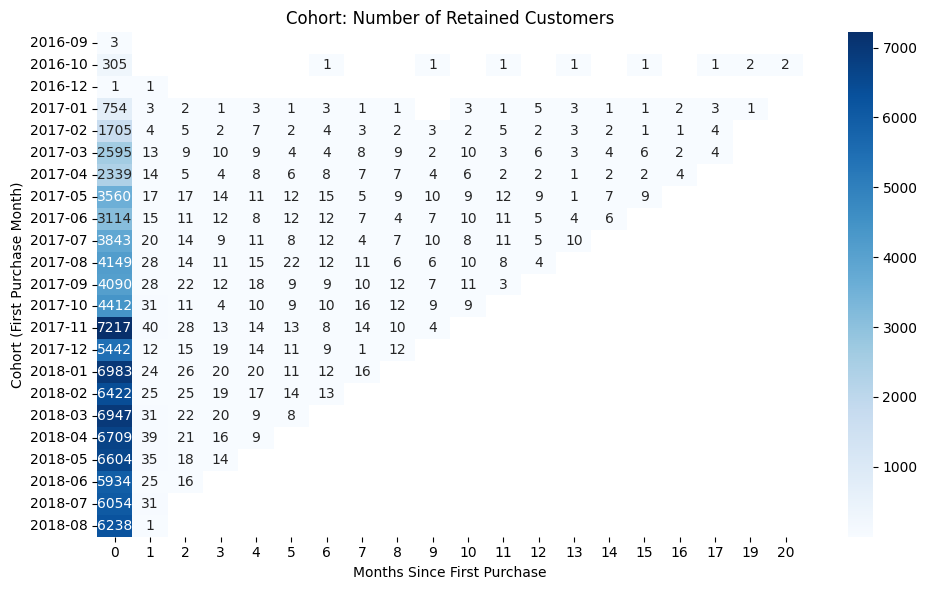

In [3]:
#Customer Retention Heatmap
retention = df.groupby(['CohortMonth', 'CohortIndex'])['customer_unique_id'].nunique().unstack(1)
plt.figure(figsize=(10, 6))
sns.heatmap(retention, annot=True, fmt='g', cmap='Blues')
plt.title("Cohort: Number of Retained Customers")
plt.ylabel("Cohort (First Purchase Month)")
plt.xlabel("Months Since First Purchase")
plt.tight_layout()
plt.show()


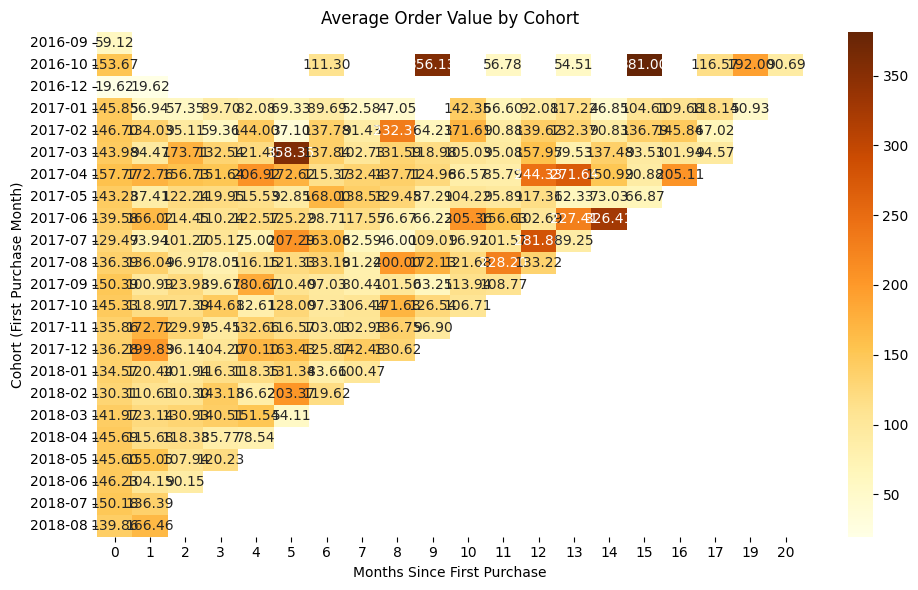

In [4]:
#Average Order Value by Cohort
df['TotalAmount'] = df['price'] + df['freight_value']
aov = df.groupby(['CohortMonth', 'CohortIndex'])['TotalAmount'].mean().unstack(1)
plt.figure(figsize=(10, 6))
sns.heatmap(aov, annot=True, fmt=".2f", cmap='YlOrBr')
plt.title("Average Order Value by Cohort")
plt.ylabel("Cohort (First Purchase Month)")
plt.xlabel("Months Since First Purchase")
plt.tight_layout()
plt.show()


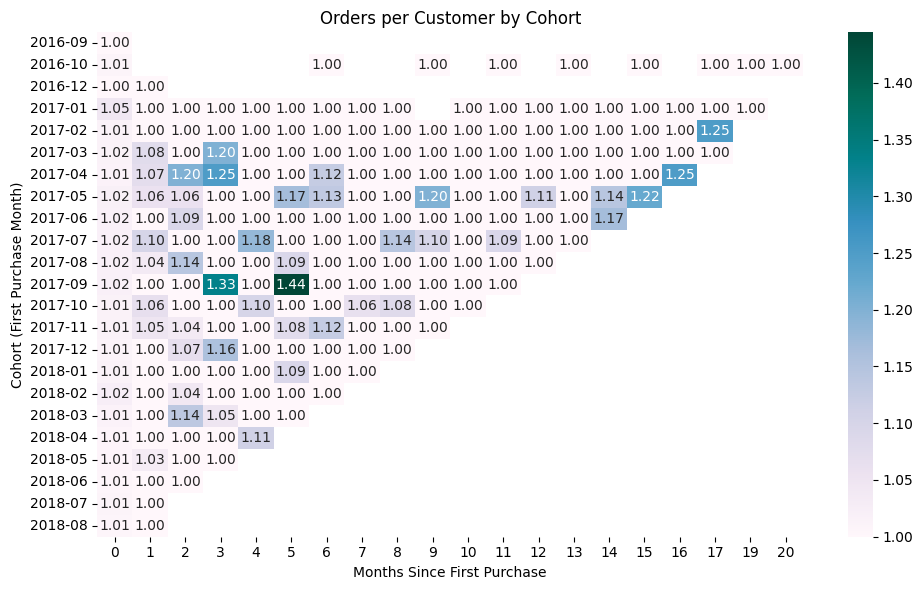

In [ ]:
#Orders per Customer by Cohort
orders = df.groupby(['CohortMonth', 'CohortIndex'])['order_id'].nunique()
customers = df.groupby(['CohortMonth', 'CohortIndex'])['customer_unique_id'].nunique()
orders_per_customer = (orders / customers).unstack(1)

plt.figure(figsize=(10, 6))
sns.heatmap(orders_per_customer, annot=True, fmt=".2f", cmap='PuBuGn')
plt.title("Orders per Customer by Cohort")
plt.ylabel("Cohort (First Purchase Month)")
plt.xlabel("Months Since First Purchase")
plt.tight_layout()
plt.show()
